# Introdução à _Machine Learning_


**Facilitadora**: [Elloá B. Guedes](www.elloaguedes.com)  
**Repositório**: http://github.com/elloa/erpo2018  
**Aluno(a)**:


### Bibliotecas

A célula a seguir está reservada para a importação de bibliotecas

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Conhecendo a base de dados

1. Abra a base de dados
2. Quais os atributos que ela possui?
3. Imprima largura das pétalas
4. Qual a média da largura das sépalas?
5. Qual o desvio padrão do comprimento da sépala?
6. Quais as características da flor que está na 101a. linha da base de dados?
7. Imprima apenas os dados das iris versicolor
8. Imprima apenas os dados das iris virginica cuja largura das sépalas é maior que a média

In [3]:
df = pd.read_csv("iris.csv", sep = ",")
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'], dtype='object')

In [6]:
df['petalWidth']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
5      0.4
6      0.3
7      0.2
8      0.2
9      0.1
10     0.2
11     0.2
12     0.1
13     0.1
14     0.2
15     0.4
16     0.4
17     0.3
18     0.3
19     0.3
20     0.2
21     0.4
22     0.2
23     0.5
24     0.2
25     0.2
26     0.4
27     0.2
28     0.2
29     0.2
      ... 
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
125    1.8
126    1.8
127    1.8
128    2.1
129    1.6
130    1.9
131    2.0
132    2.2
133    1.5
134    1.4
135    2.3
136    2.4
137    1.8
138    1.8
139    2.1
140    2.4
141    2.3
142    1.9
143    2.3
144    2.5
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petalWidth, Length: 150, dtype: float64

In [9]:
np.mean(df['sepalWidth'])

3.0540000000000007

In [10]:
np.std(df['sepalLength'])

1.7585291834055201

In [11]:
df.iloc[101]

sepalLength          5.8
sepalWidth           2.7
petalLength          5.1
petalWidth           1.9
species        virginica
Name: 101, dtype: object

In [12]:
df.loc[df['species'] == 'versicolor']

,sepalLength,sepalWidth,petalLength,petalWidth,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [16]:
df.loc[(df['species'] == 'virginica') & (df['sepalWidth'] > np.mean(df['sepalWidth']))]

,sepalLength,sepalWidth,petalLength,petalWidth,species
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
110,6.5,3.2,5.1,2.0,virginica
115,6.4,3.2,5.3,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
120,6.9,3.2,5.7,2.3,virginica
124,6.7,3.3,5.7,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
131,7.9,3.8,6.4,2.0,virginica
136,6.3,3.4,5.6,2.4,virginica


## Preparando a base de dados para Machine Learning

1. Remova a coluna species e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [17]:
Y = df['species']
df.drop(['species'],axis=1,inplace=True)

In [18]:
X = df

In [21]:
# Necessário importar: from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

## Treinando Modelos - Árvore de Decisão

1. Instancie uma árvore de decisão com parâmetros padrões
2. Treine e árvore de decisão

In [27]:
# Adicionar nas bibliotecas: from sklearn import tree
arv = tree.DecisionTreeClassifier()

In [28]:
arv.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Testando Modelos - Árvore de Decisão

1. Obtenha as previsões desta árvore para o conjunto de testes
2. Calcule a acurácia deste modelo  
    2.1 Da biblioteca sklearn.metrics efetue a importação do accuracy_score
3. Obtenha a matriz de confusão destas previsões  
    3.1 Da biblioteca sklearn.metrics fetue a importação do confusion_matrix  
4. Obtenha uma visualização mais agradável desta matriz de confusão  
    4.1 Visualize o arquivo iris-confusao.pdf


In [31]:
Y_previsto = arv.predict(X_test)

In [32]:
accuracy_score(y_true=Y_test,y_pred=Y_previsto)

0.9777777777777777

In [34]:
matrizcf = confusion_matrix(y_true=Y_test,y_pred=Y_previsto)
matrizcf

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]])

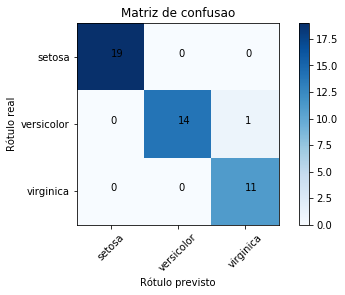

In [35]:
# Plotando matriz de confusão
# a matriz de confusão deve estar numa variável matrizcf
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap=plt.cm.Blues
normalize = False
classes =  ["setosa","versicolor","virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
plt.savefig("iris-confusao.pdf")
plt.show()

## Comparando Modelos - k-Vizinhos Mais Próximos

1. Treine um classificador k-Vizinhos Mais Próximos para este problema, com vizinhança de 3  
2. Obtenha a acurácia deste modelo para o conjunto de testes  
3. Considerando esta métrica, qual modelo tem melhor desempenho nesta tarefa?

In [41]:
kviz = KNeighborsClassifier(n_neighbors=5)
kviz.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
Y_previsto2 = kviz.predict(X_test)

In [43]:
accuracy_score(y_true=Y_test,y_pred=Y_previsto2)

0.9777777777777777